In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# ===============================
# 1. LOAD DATASET
# ===============================
df = pd.read_csv("credit_card_default.csv")

print("Dataset Shape:", df.shape)

# ===============================
# 2. ENCODE CATEGORICAL COLUMNS
# ===============================
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# ===============================
# 3. SPLIT FEATURES & TARGET
# ===============================
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# ===============================
# 4. HANDLE MISSING VALUES (CRITICAL STEP)
# ===============================
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

print("Total NaN values after imputation:", np.isnan(X).sum())

# ===============================
# 5. TRAIN–TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ===============================
# 6. FEATURE SCALING
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Dataset Shape: (30000, 25)
Total NaN values after imputation: 0
NaNs in X_train: 0
NaNs in X_test: 0
Training data shape: (24000, 24)
Testing data shape: (6000, 24)


In [33]:
pip install xgboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 1.8/101.7 MB 9.2 MB/s eta 0:00:11
   - -------------------------------------- 4.5/101.7 MB 10.3 MB/s eta 0:00:10
   -- ------------------------------------- 6.8/101.7 MB 10.8 MB/s eta 0:00:09
   --- ------------------------------------ 8.9/101.7 MB 10.9 MB/s eta 0:00:09
   ---- ----------------------------------- 11.0/101.7 MB 10.6 MB/s eta 0:00:09
   ----- ---------------------------------- 13.4/101.7 MB 10.5 MB/s eta 0:00:09
   ------ --------------------------------- 16.0/101.7 MB 10.7 MB/s eta 0:00:08
   ------- -------------------------------- 18.6/101.7 MB 10.9 MB/s eta 0:00:08
   -------- ------------------------------- 20.7/101.7 MB 11.0 MB/s eta 0:00:08
   --------- ------------------------------ 23.3/101.7 MB 11.0 MB/s eta 0:00:08
   ---------- ----------------------------- 25.7/101.7 MB 11.1 MB/s eta 0:00:07
   ----------- ---------------------------- 28.3/101.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    precision_score, recall_score,
    f1_score, matthews_corrcoef
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary'),
        matthews_corrcoef(y_test, y_pred)
    ])

comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"]
)

comparison_df


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.779000,0.710994,0.503226,0.058779,0.105263,0.110670
1,Decision Tree,0.729167,0.615421,0.392806,0.411454,0.401914,0.227086
2,kNN,0.780167,0.682001,0.504988,0.305200,0.380460,0.268616
3,Naive Bayes,0.550500,0.660036,0.294910,0.742276,0.422113,0.199101
4,Random Forest,0.811333,0.758984,0.634855,0.345893,0.447805,0.368949
5,XGBoost,0.809500,0.760922,0.617949,0.363225,0.457523,0.369557


In [61]:
import joblib
import os

os.makedirs('saved_models', exist_ok=True)
for name, model in models.items():
    joblib.dump(model, f'saved_models/{name.replace(" ", "_")}.pkl')
print("All models saved successfully!")

All models saved successfully!


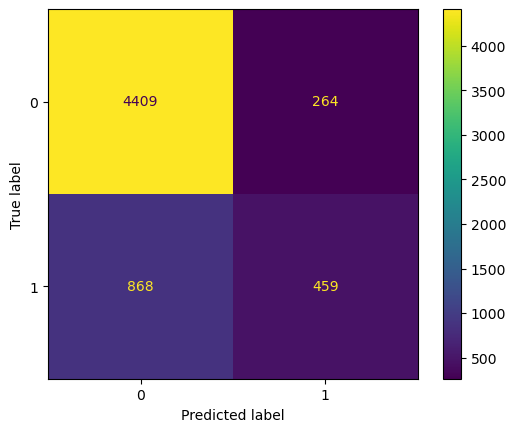

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_clf = RandomForestClassifier(n_estimators=100, random_state=42)
best_clf.fit(X_train, y_train)

cm = confusion_matrix(y_test, best_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [55]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\welcome\anaconda3\lib\site-packages (1.37.1)

